# Principal Component Analysis

PCA is a data-reduction technique that finds appication in a wide variaty of fields, including biology, sociology, physics, medicine, and audio processing.

### Basic Idea

PCA involves making a coordinate transformation (rotation) from the original arbitrary axes (or 'features') to a set of axes aligned with the data itself. Doing this almost always means reducting the components of the data that have small variance with each other without suffering too much loss in accuracy and gaining the benefits of simplicity (computation and time).

### The Process

1. Covariance: Find the *covariance matrix* for your dataset.
2. Eigenvectors: Find the *eigenvectors* of that matrix (i.e. components)
3. Ordering: Sort the *eigenvectors* or dimensions from largest to smallest variance.
4. Projection/Data Reduction: Use the *eigenvectors* corresponding to the largest variance to project the dataset into a reduced dimensional space.
5. Confirm: How much was lost from the truncation?

> Caveat: Since PCA will involve making linear transformations, there are some situations where PCA won't help.

## Covariance

> If two data dimensions vary together, they are covariant

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# define the plot
N = 100 
x = np.random.normal(size=N)
y = 0.5*x + 0.2*(np.random.normal(size=N))

In [4]:
# define scatter plot canvas and data
fig = go.Figure(data = [
    go.Scatter(x=x,
               y=y,
               mode='markers',
               marker=dict(size=8,opacity=0.5),
               name="data")
])

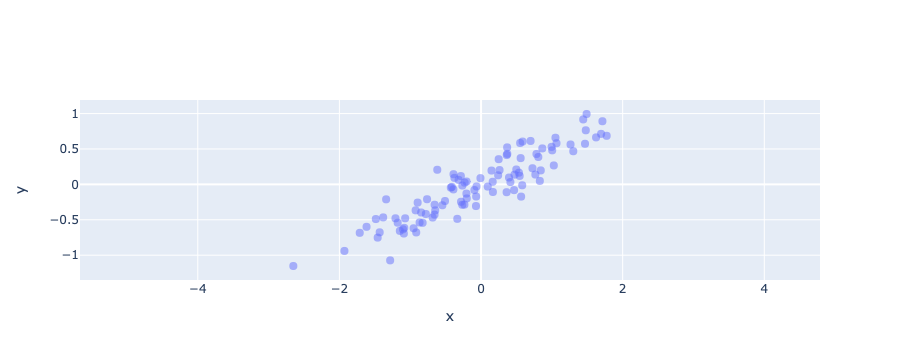

In [5]:
# define plot axes
fig.update_layout(
    xaxis_title="x",
    yaxis_title="y",
    yaxis = dict(scaleanchor = "x",scaleratio = 1)
)

fig.show()

### Variance

For the `x` component, there's some *mean* value (zero in this case) and some *variance* about this mean. Technically, the variance is the average of the squared differences from the mean.

Similarly, we can look at the variance in just the `y` component of the data.

In [6]:
print("Variance in x =",np.var(x))
print("Variance in y =",np.var(y))

Variance in x = 0.8548354976996086
Variance in y = 0.21424144027729683


### Covariance

Established above, as `x` varies, so does `y`. So `y` is a *covariant* of `x`. Coveriance indicates the level to which two variables vary together.

In [10]:
# define the covariance formula
def covariance(a,b):
    return ( (a - a.mean())*(b - b.mean()) ).sum() / (len(a)-1)

In [11]:
print("Covariance of x & y =",covariance(x,y))
print("Covariance of y & x =",covariance(x,y))
print("Covariance of x with itself =",covariance(x,x),", variance of x =",np.var(x))
print("Covariance of y with itself =",covariance(y,y),", variance of x =",np.var(y))

Covariance of x & y = 0.3954548460753201
Covariance of y & x = 0.3954548460753201
Covariance of x with itself = 0.8634701996965743 , variance of x = 0.8548354976996086
Covariance of y with itself = 0.21640549522959274 , variance of x = 0.21424144027729683


### Covariance Matrix

Take the covariance of every variable with every variable (including itself) and make a matrix. Along the diagonal will be the variance of each variable and the rest of the matrix will be covariances. Note that since the order of the variables doesn't matter when computing covariance, the matrix will be *symmetric* (symmetric across the diagonal) and thus will be a square matrix.

In [14]:
# pack the x & y data together in one 2D array
data = np.stack((x,y),axis=1)
print("data.shape =",data.shape)

data.shape = (100, 2)


In [15]:
# transpose because numpy wants varibles along rows rather than down columns
cov = np.cov(data.T) 
print("covariance matrix =\n",cov)

covariance matrix =
 [[0.8634702  0.39545485]
 [0.39545485 0.2164055 ]]


## Example Data

Generate some 3D data that we can use for the next step. But first, calculate the *covariance matrix*.
> Note: Because 3 variables (or dimension) are defined, the covariance matrix will now be 3x3.

In [19]:
z = -.5*x + 2*np.random.uniform(size=N)
data = np.stack((x,y,z)).T
print("data.shape =",data.shape)

data.shape = (100, 3)


In [20]:
cov = np.cov(data.T)
print("covariance matrix =\n",cov)

covariance matrix =
 [[ 0.8634702   0.39545485 -0.39131592]
 [ 0.39545485  0.2164055  -0.18159484]
 [-0.39131592 -0.18159484  0.48059643]]


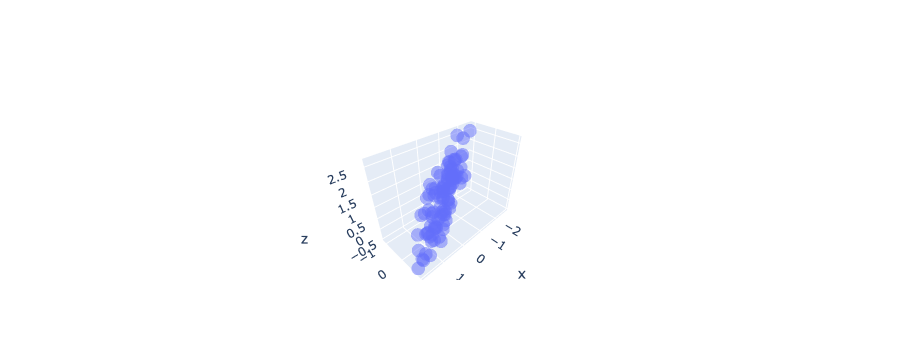

In [21]:
# Plot our data
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers', marker=dict(size=8,opacity=0.5), name="data" )])
fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

> Note: Even though our`z` data didn't explicitly depend on `y`, because `y` is covariannt with `x`, `z` and `y` have *coincidently* nonzero covariance. This is true for many datasets where two variables are correlated and may give rise to *confounding* factors.

## Principal Components (Eigenvectors)

In [23]:
# import numpy's linear algebra module as LA
from numpy import linalg as LA

In [26]:
# find the eigenvalues and eigenvectors of the *coveriance matrix*
lambdas, vs = LA.eig(cov)
lambdas, vs

(array([1.28284317, 0.24867407, 0.02895488]),
 array([[-0.79645472, -0.42197409, -0.43312555],
        [-0.37598523, -0.21540514,  0.90124122],
        [ 0.47359792, -0.88064663, -0.01290441]]))

In [27]:
# define sample array
A = np.array([[-2,2,1],[-5,5,1],[-4,2,3]])

In [30]:
# For now we sort 'by convention'. For PCA the sorting is key.
def sorted_eig(A): 
    lambdas, vs = LA.eig(A)
    
    # Next line just sorts values & vectors together in order of decreasing eigenvalues
    lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)), key=lambda x: x[0], reverse=True))
    return lambdas, np.array(vs).T  # un-doing the list-casting from the previous line

In [31]:
lambdas, vs = sorted_eig(A)
lambdas # hold off on printing out the eigenvectors until we do the next part!

(3.0000000000000013, 1.999999999999999, 1.0000000000000004)

> Use the eigenvalues to get the eigenvectors.

In [40]:
print(" "*15,"Ours"," "*28,"Numpy")
print(np.array([1,2,1])/np.sqrt(6), vs[:,0])
print(np.array([1,1,2])/np.sqrt(6), vs[:,1])
print(np.array([1,1,1])/np.sqrt(3), vs[:,2])

                Ours                              Numpy
[0.40824829 0.81649658 0.40824829] [-0.79645472 -0.37598523  0.47359792]
[0.40824829 0.40824829 0.81649658] [-0.42197409 -0.21540514 -0.88064663]
[0.57735027 0.57735027 0.57735027] [-0.43312555  0.90124122 -0.01290441]


In [47]:
print("A*v_1 / 3 = ", np.matmul(A, np.array([1,2,1]).T)/3 ) # Dividing by eigenvalue 
print("A*v_2 / 2 = ", np.matmul(A, np.array([1,1,2]).T)/2 ) # to get vector back
print("A*v_3 / 1 = ", np.matmul(A, np.array([1,1,1]).T) )

A*v_1 / 3 =  [1. 2. 1.]
A*v_2 / 2 =  [1. 1. 2.]
A*v_3 / 1 =  [1 1 1]


### Using the Above Example on Dataset

In [52]:
# Compute e'vals and e'vectors of cov matrix 
lambdas, vs = sorted_eig(cov)
print("lambdas, vs =\n",lambdas,"\n",vs)

lambdas, vs =
 (1.2828431748372344, 0.2486740703738206, 0.028954876995641594) 
 [[-0.79645472 -0.42197409 -0.43312555]
 [-0.37598523 -0.21540514  0.90124122]
 [ 0.47359792 -0.88064663 -0.01290441]]


In [53]:
# Re-plot our data
fig = go.Figure(data = [
    go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',  
        marker=dict(size=8,opacity=0.5), name="data" )
])

In [55]:
# Draw some extra 'lines' showing eigenvector directions
# The lines will be made of lots of balls in a line
# size of balls
# parameterizer for drawing along vec directions
n_ev_balls = 50
ev_size= 3
t = np.linspace(0,1,num=n_ev_balls)  

In [61]:
# do this for each eigenvector 
for i in range(3):
    # Uncomment the next line to scale (unit) vector by size of the eigenvalue
    # vs[:,i] *= lambdas[i] 
    ex, ey, ez = t*vs[0,i], t*vs[1,i],  t*vs[2,i]
    fig.add_trace(go.Scatter3d(
        x=ex,
        y=ey,
        z=ez,
        mode='markers',
        marker=dict(size=ev_size,opacity=0.8), name="v_"+str(i+1)
    ))

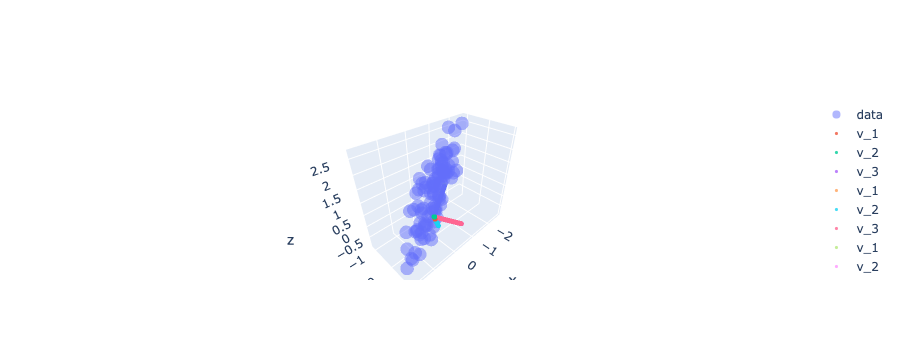

In [62]:
fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

1. The first (red) eigenvector pointsalong the direction of the largest variance.
2. The second (greenish) eigenvector points along the direction of the second-largest variance.
3. The third (purple) eigenvector points along the direction of smallest variance.

## Project the Data onto the Eigenvalues

In [64]:
# project the covariance matrix, using eigenvectors
lambdas, vs = sorted_eig(cov)  

In [65]:
proj_cov = vs.T @ cov @ vs
proj_cov

array([[ 1.28284317e+00, -1.65613089e-16,  1.00608944e-16],
       [-3.63058124e-17,  2.48674070e-01,  4.15715248e-17],
       [ 9.00555206e-17,  5.59996300e-17,  2.89548770e-02]])

In [66]:
proj_cov[np.abs(proj_cov) < 1e-15] = 0
proj_cov

array([[1.28284317, 0.        , 0.        ],
       [0.        , 0.24867407, 0.        ],
       [0.        , 0.        , 0.02895488]])

In [67]:
data = np.stack((x,y,z),axis=1)
data.shape   # we had a 100 data points, so expecting 100x3 matrix 

(100, 3)

Two ways of accomplishing the data dump onto the new coordinates

In [73]:
print("\n 1. All data, rotated into new coordinate system")
W = vs[:,0:3]  # keep the all the eigenvectors
new_data_all = data @ W  # project all the data 
print("Checking: new_data_all.shape =",new_data_all.shape)
print("New covariance matrix = \n",np.cov(new_data_all.T) )


 1. All data, rotated into new coordinate system
Checking: new_data_all.shape = (100, 3)
New covariance matrix = 
 [[ 1.28284317e+00 -1.46796700e-16  3.41308478e-17]
 [-1.46796700e-16  2.48674070e-01  5.24766271e-17]
 [ 3.41308478e-17  5.24766271e-17  2.89548770e-02]]


In [74]:
print("\n 2. Truncated data projected onto principal axes of coordinate system")

W = vs[:,0:2]  # keep only the first and 2nd eigenvectors 
print("W.shape = ",W.shape) 
new_data_proj = data @ W   # project 
print("Checking: new_data_proj.shape =",new_data_proj.shape)
print("New covariance matrix in projected space = \n",np.cov(new_data_proj.T) )


 2. Truncated data projected onto principal axes of coordinate system
W.shape =  (3, 2)
Checking: new_data_proj.shape = (100, 2)
New covariance matrix in projected space = 
 [[ 1.28284317e+00 -1.46796700e-16]
 [-1.46796700e-16  2.48674070e-01]]


In [75]:
# Difference between them
diff = new_data_all[:,0:2] - new_data_proj
print("\n Absolute maximum difference between the two methods = ",np.max(np.abs(diff)))


 Absolute maximum difference between the two methods =  0.0


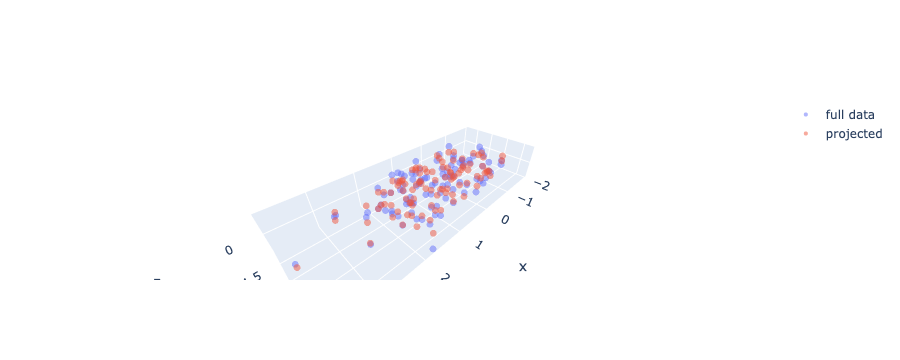

In [76]:
fig = go.Figure(data = [(
    go.Scatter3d(
        x=new_data_all[:,0],
        y=new_data_all[:,1],
        z=new_data_all[:,2],
        mode='markers',
        marker=dict(size=4, opacity=0.5), name="full data")
)])

fig.add_trace(
    go.Scatter3d(
        x=new_data_proj[:,0],
        y=new_data_proj[:,1],
        z=new_data_proj[:,0]*0,
        mode='markers',
        marker=dict(size=4,opacity=0.5),
        name="projected" ))

fig.update_layout(scene_aspectmode='data')
fig.show()

# Working With Another Dataset

In [78]:
from sklearn.datasets import load_digits 
from sklearn.decomposition import PCA

In [79]:
digits  = load_digits()
X = digits.data / 255.0 
Y = digits.target
print(X.shape, Y.shape,'\n')

(1797, 64) (1797,) 



This is supposed to be a '0':


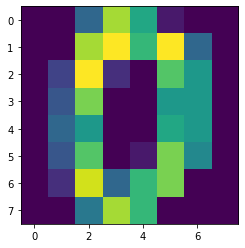

This is supposed to be a '1':


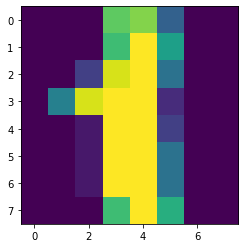

This is supposed to be a '2':


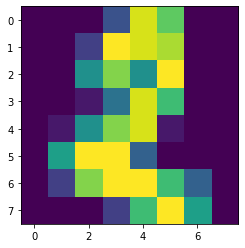

This is supposed to be a '3':


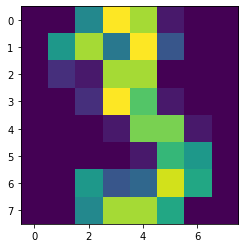

This is supposed to be a '4':


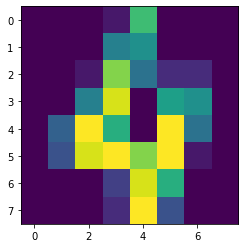

This is supposed to be a '5':


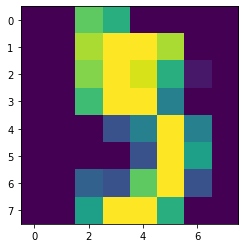

This is supposed to be a '6':


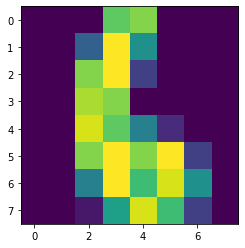

This is supposed to be a '7':


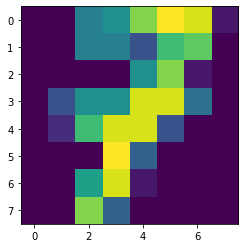

In [81]:
# Let's look a a few examples
for i in range(8):  # show 8 examples 
    print("This is supposed to be a '",Y[i],"':",sep="")
    plt.imshow(X[i].reshape([8,8]))
    plt.show()

In [82]:
digits_cov = np.cov(X.T)
print("digits_cov.shape = ", digits_cov.shape)
lambdas, vs = sorted_eig(np.array(digits_cov)) 

digits_cov.shape =  (64, 64)


In [83]:
# just keep two dimensions
W = vs[:,0:2]
proj_digits = X @ W
print("proj_digits.shape = ", proj_digits.shape)

proj_digits.shape =  (1797, 2)


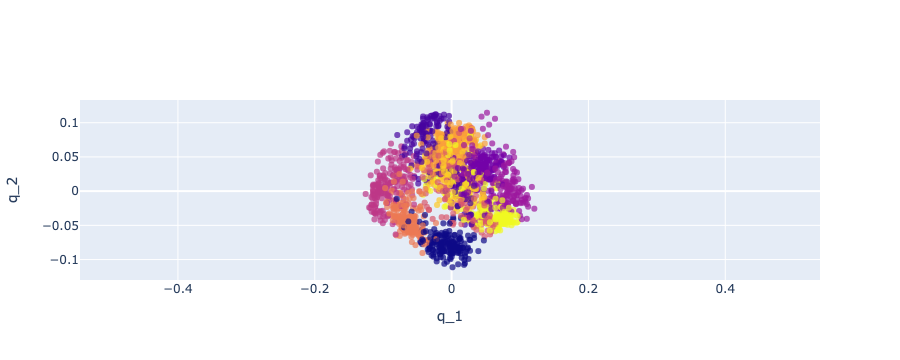

In [84]:
# Make the plot 
fig = go.Figure(data=[go.Scatter(x=proj_digits[:,0], y=proj_digits[:,1],# z=Y, #z=proj_digits[:,2],
                mode='markers', marker=dict(size=6, opacity=0.7, color=Y), text=['digit='+str(j) for j in Y] )])
fig.update_layout( xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=0, z=1.5)))
fig.show()

In [86]:
W = vs[:,0:3]  # just three dimensions
proj_digits = X @ W
print("proj_digits.shape = ", proj_digits.shape)

proj_digits.shape =  (1797, 3)


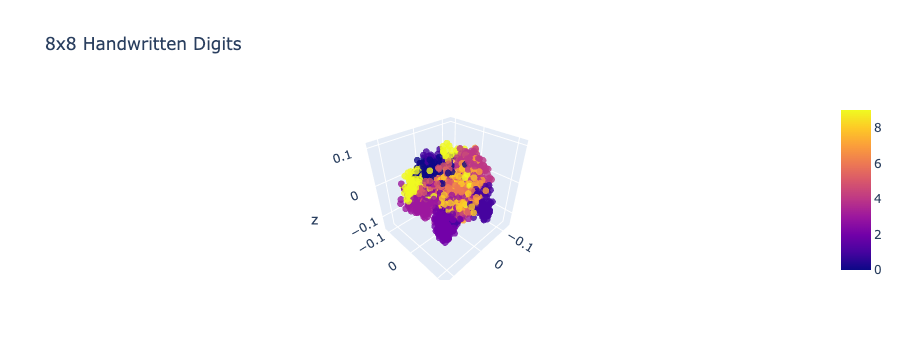

In [87]:
# Make the plot, separate them by "z" which is the digit of interest.  
fig = go.Figure(data=[go.Scatter3d(x=proj_digits[:,0], y=proj_digits[:,1], z=proj_digits[:,2],
                mode='markers', marker=dict(size=4, opacity=0.8, color=Y, showscale=True), 
                text=['digit='+str(j) for j in Y] )])
fig.update_layout(title="8x8 Handwritten Digits", xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

### Graph Variance vs. Components

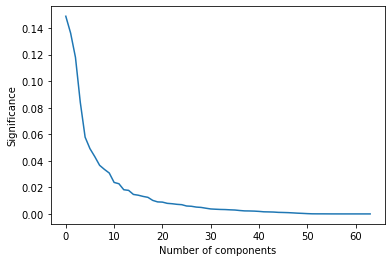

In [88]:
plt.plot( np.abs(lambdas)/np.sum(lambdas) )
plt.xlabel('Number of components')
plt.ylabel('Significance') 
plt.show()